In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "car_sales_data.csv"

# Load the dataset from kaggle without downloading it locally
df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "msnbehdani/mock-dataset-of-second-hand-car-sales", file_path)
df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


If you want to take just the mere values of the dataset (losing then the column names etc...)

In [2]:
numpy_array = df.to_numpy()
print(numpy_array)

[['Ford' 'Fiesta' 1.0 ... 2002 127300 3074]
 ['Porsche' '718 Cayman' 4.0 ... 2016 57850 49704]
 ['Ford' 'Mondeo' 1.6 ... 2014 39190 24072]
 ...
 ['Ford' 'Mondeo' 1.6 ... 2022 4030 49852]
 ['Ford' 'Focus' 1.0 ... 2016 26468 23630]
 ['VW' 'Golf' 1.4 ... 2012 109300 10400]]


In [3]:
numpy_array[:3,0]

array(['Ford', 'Porsche', 'Ford'], dtype=object)

In general, for plotting, pandas already has matplotlib inside, so we can use, to be fast, built-in functions

<Axes: title={'center': 'Price vs Year of Manufacture'}, xlabel='Year of manufacture', ylabel='Price'>

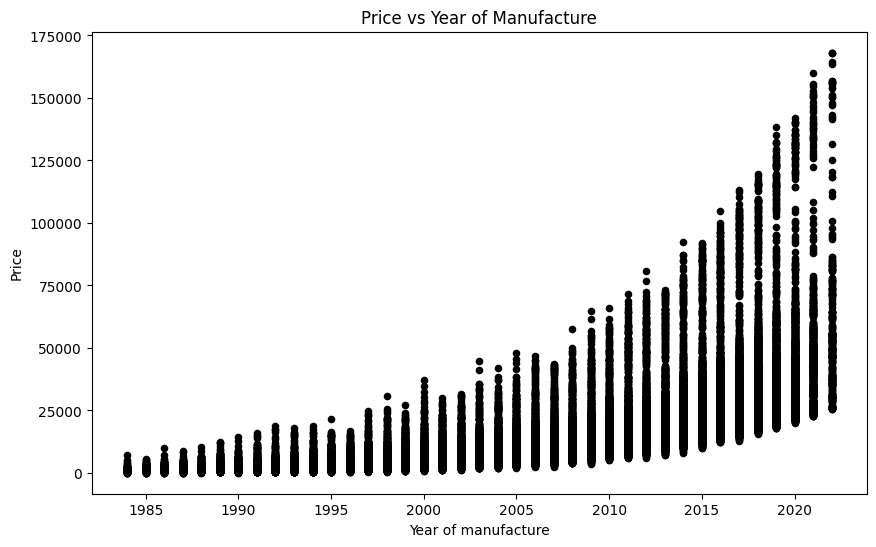

In [4]:
df.plot(figsize=(10,6), x='Year of manufacture', y='Price', kind='scatter', color='black', title='Price vs Year of Manufacture')

to figure out how many bins to use

In [5]:
min_year = df['Year of manufacture'].min()
max_year = df['Year of manufacture'].max()
total_years = max_year - min_year + 1
print("the first year in the dataset is", min_year, "while the last one is", max_year)
print("in total there are", total_years, "years")

the first year in the dataset is 1984 while the last one is 2022
in total there are 39 years


<Axes: ylabel='Frequency'>

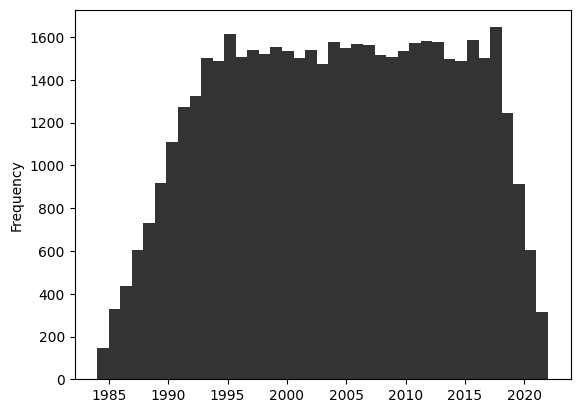

In [6]:
df['Year of manufacture'].plot(kind='hist', color='black', bins=39, alpha=0.8)

imagine that I want to take the values of all the years in which more than 1600 cars have been sold

<Axes: xlabel='Manufacturer,Model'>

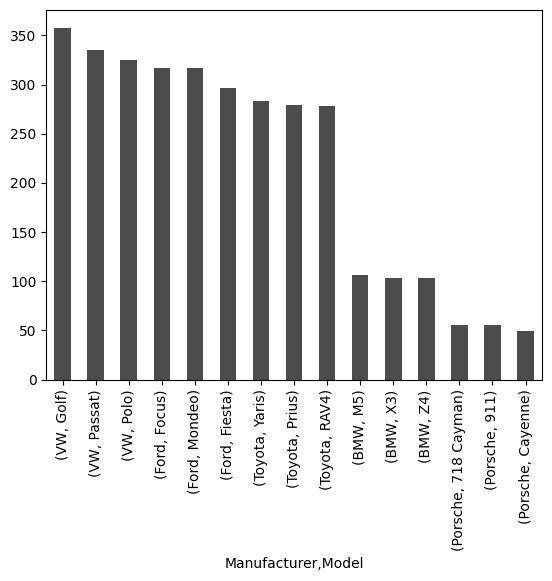

In [7]:
df_by_year = df.groupby('Year of manufacture').agg(
    cars_per_year = ('Manufacturer', 'count')
).reset_index()

years_list = df_by_year[df_by_year['cars_per_year'] >= 1600]['Year of manufacture'].to_list()

df[df['Year of manufacture'].isin(years_list)][['Manufacturer', 'Model']].value_counts().plot(kind='bar', color='black', alpha=0.7)